_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
income = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")

In [162]:
lifespan = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [5]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [6]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [7]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [8]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

In [9]:
income.head(), lifespan.head(), population.head()

(   geo  time  income_per_person_gdppercapita_ppp_inflation_adjusted
 0  abw  1800                                                833    
 1  abw  1801                                                833    
 2  abw  1802                                                833    
 3  abw  1803                                                833    
 4  abw  1804                                                833    ,
    geo  time  life_expectancy_years
 0  abw  1800                  34.42
 1  abw  1801                  34.42
 2  abw  1802                  34.42
 3  abw  1803                  34.42
 4  abw  1804                  34.42,
    geo  time  population_total
 0  abw  1800             19286
 1  abw  1801             19286
 2  abw  1802             19286
 3  abw  1803             19286
 4  abw  1804             19286)

In [10]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [11]:
df = pd.merge(income, lifespan)


In [13]:
df = pd.merge(df,population)

In [12]:
variables = ['country', 'name', 'world_6region']
pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,country,name,world_6region
0,abw,1800,833,34.42,abw,Aruba,america
1,abw,1801,833,34.42,abw,Aruba,america
2,abw,1802,833,34.42,abw,Aruba,america
3,abw,1803,833,34.42,abw,Aruba,america
4,abw,1804,833,34.42,abw,Aruba,america


In [14]:
df = pd.merge(df, entities[variables], how='inner', left_on='geo', right_on='country')
df.drop(columns=['geo', 'country'],inplace=True)


,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america
5,1805,833,34.42,19286,Aruba,america
6,1806,833,34.42,19286,Aruba,america
7,1807,834,34.42,19286,Aruba,america
8,1808,834,34.42,19286,Aruba,america
9,1809,834,34.42,19286,Aruba,america


In [17]:
df = df.rename(columns={
    'time':'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'income',
    'life_expectancy_years' : 'lifespan',
    'population_total' : 'population',
    'name': 'country',
    'world_6region' : 'region'
})

In [18]:
now = df[df.year==2018]

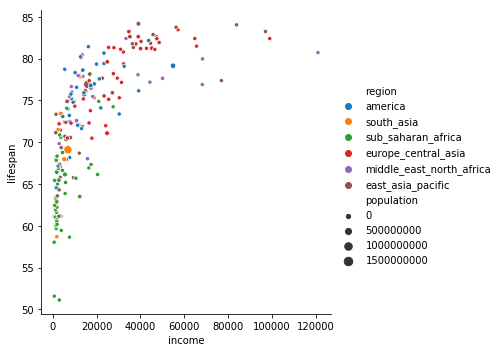

In [23]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

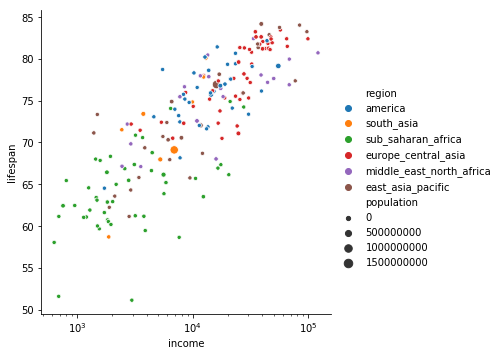

In [39]:
sns.relplot(x='income', y='lifespan', hue='region',
            size='population', data=now).set(xscale='log')


In [36]:
now[now.income > 80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [43]:
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

Text(0.5,1,'Qatar has the highest incomes in 2018')

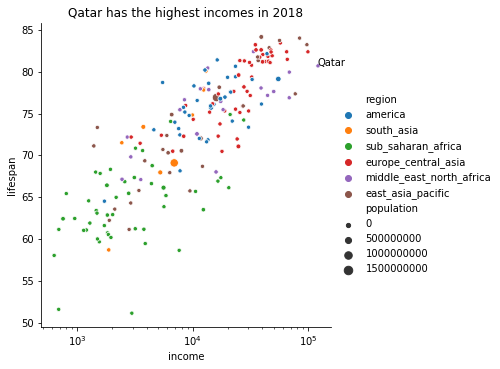

In [47]:
sns.relplot(x='income', y='lifespan', hue='region',
            size='population', data=now).set(xscale='log')
plt.text(x= qatar_income, y= qatar.lifespan, s='Qatar')
plt.title('Qatar has the highest incomes in 2018')

In [50]:
years = [1818,1918,2018]
centuries = df[df.year.isin(years)]

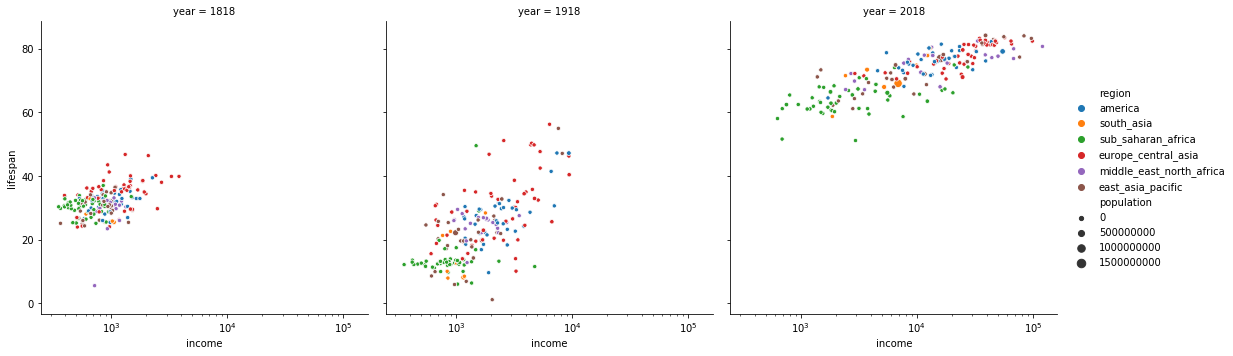

In [52]:
sns.relplot(x='income', y='lifespan', hue='region',
            size='population',col='year', data=centuries).set(xscale='log')

In [53]:
years = [1918, 1938, 1958, 1978, 1998, 2018]

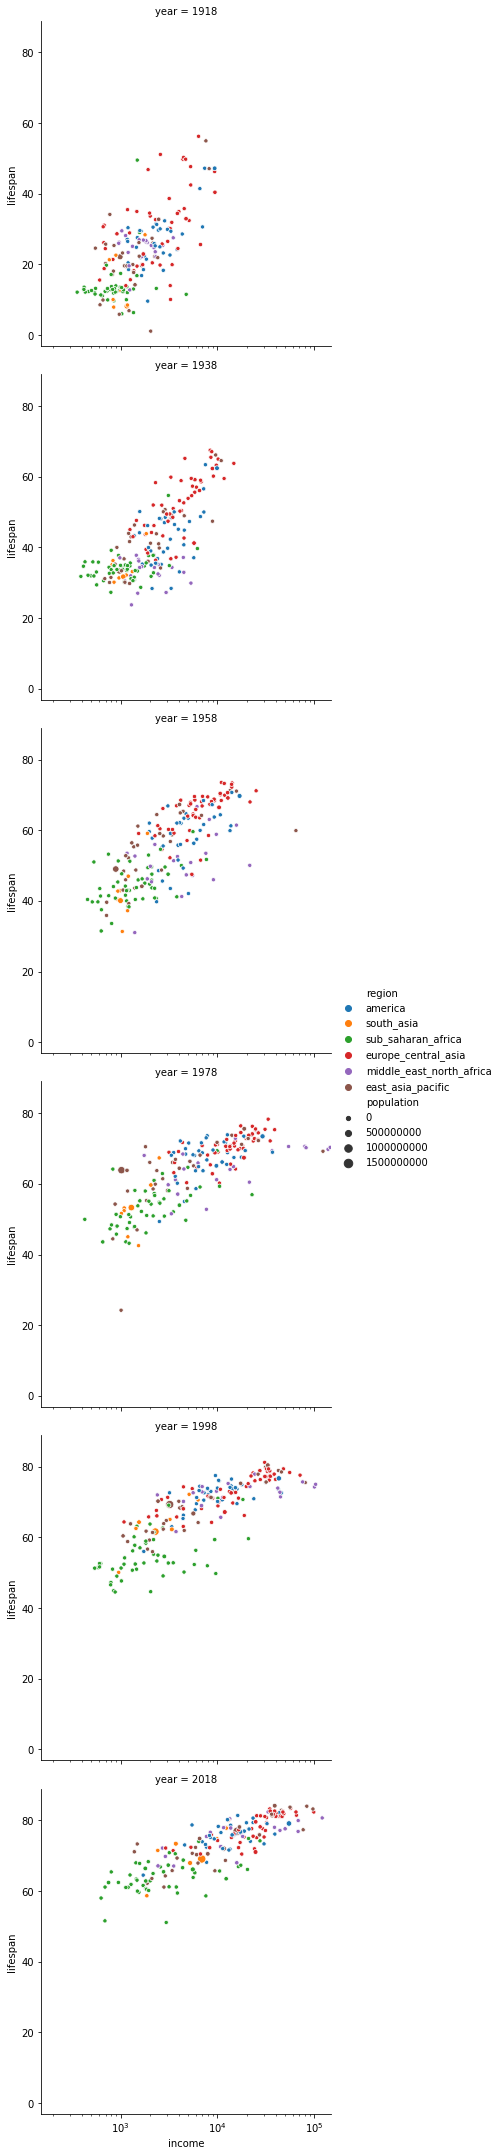

In [58]:
subset = df[df.year.isin(years)]

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            row='year', data=subset)
plt.xscale('log')
plt.xlim((150, 150000));

# assignment

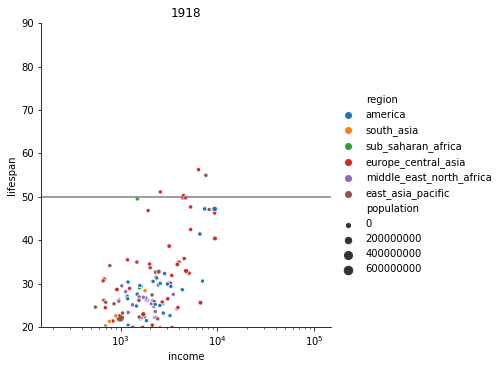

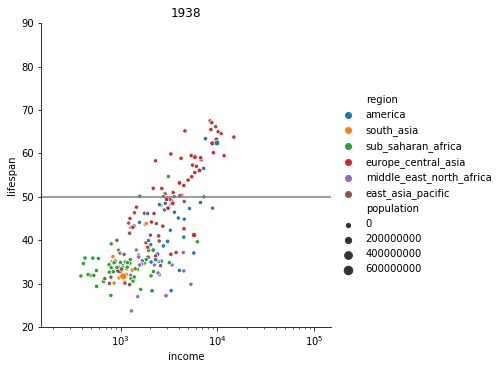

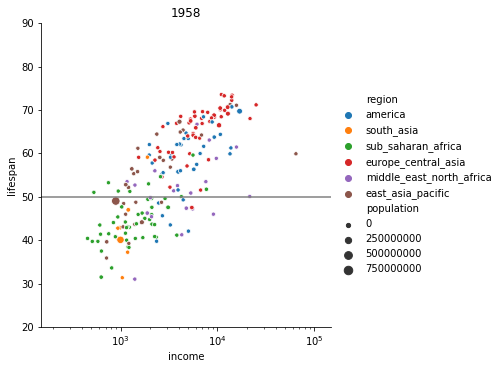

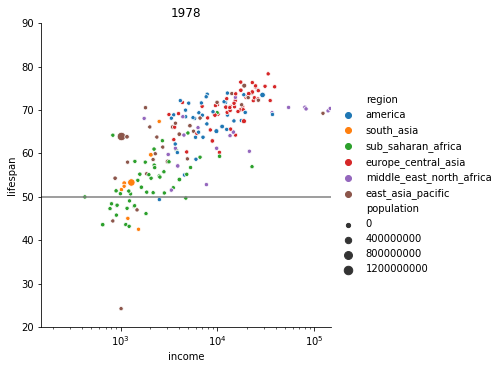

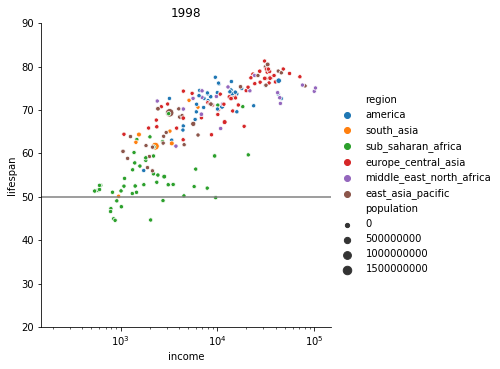

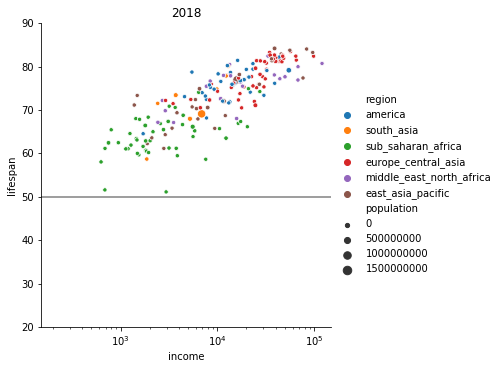

In [79]:
for year in years:
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])
   
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');
    plt.pause(0.1)

(20, 60)

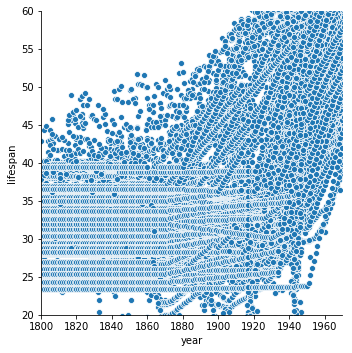

In [107]:
sns.relplot(data=df,x='year', y='lifespan', kind='scatter' )
plt.xlim(1800,1970)
plt.ylim((20, 60))


In [104]:
#df.drop(columns='log_income', inplace=True)
df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


In [109]:
df['lifespan_change']=df['lifespan'].pct_change()

(-2, 5)

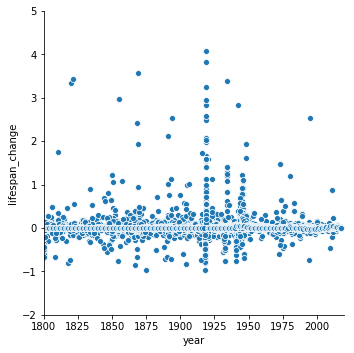

In [116]:
sns.relplot(data=df,x='year', y='lifespan_change', kind='scatter' )
plt.xlim(1800,2020)
plt.ylim((-2, 5))

In [128]:
df[(df['lifespan_change'] ==0.00 )& (df['year'] == 1850)].count()/df[df['year']==1850].count()

year               0.905263
income             0.905263
lifespan           0.905263
population         0.905263
country            0.905263
region             0.905263
change             0.905263
lifespan_change    0.905263
dtype: float64

In [182]:
real_change = df[(df['lifespan_change'] != 0.00) ]
real_change.head()


,year,income,lifespan,population,country,region,change,lifespan_change
0,1800,833,34.42,19286,Aruba,america,NaN,NaN
118,1918,1765,22.32,32202,Aruba,america,-0.351540,-0.351540
119,1919,1808,34.42,32371,Aruba,america,0.542115,0.542115
122,1922,1947,35.25,32883,Aruba,america,0.024114,0.024114
123,1923,1996,36.07,33055,Aruba,america,0.023262,0.023262


In [189]:
real_change[(real_change['year'] == 1922) | (real_change['year'] == 1923) |(real_change['year'] == 1924)].sort_values(['lifespan_change'], ascending=False)

,year,income,lifespan,population,country,region,change,lifespan_change
19968,1923,1385,29.57,1357625,Kyrgyz Republic,europe_central_asia,1.128870,1.128870
37097,1923,1205,27.67,943559,Turkmenistan,europe_central_asia,0.457850,0.457850
36878,1923,640,29.09,1188374,Tajikistan,europe_central_asia,0.418333,0.418333
19530,1923,1457,32.40,5219008,Kazakhstan,europe_central_asia,0.384615,0.384615
39723,1923,602,32.91,4868588,Uzbekistan,europe_central_asia,0.372394,0.372394
31841,1923,1831,33.47,80049344,Russia,europe_central_asia,0.360016,0.360016
2579,1923,472,31.83,1866438,Burundi,sub_saharan_africa,0.286061,0.286061
39066,1923,973,40.58,29007131,Ukraine,europe_central_asia,0.275699,0.275699
4550,1923,715,43.07,6074183,Belarus,europe_central_asia,0.256784,0.256784
38410,1922,1785,36.68,3763369,Taiwan,east_asia_pacific,0.220226,0.220226


In [195]:
df[df['country']=='Kyrgyz Republic']

,year,income,lifespan,population,country,region,change,lifespan_change
19845,1800,508,23.94,530343,Kyrgyz Republic,europe_central_asia,-0.644543,-0.644543
19846,1801,508,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19847,1802,508,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19848,1803,508,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19849,1804,508,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19850,1805,508,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19851,1806,509,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19852,1807,509,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19853,1808,509,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000
19854,1809,509,23.94,530343,Kyrgyz Republic,europe_central_asia,0.000000,0.000000


In [212]:
df[df['country']=='Kyrgyz Republic']['lifespan'].min()

11.91

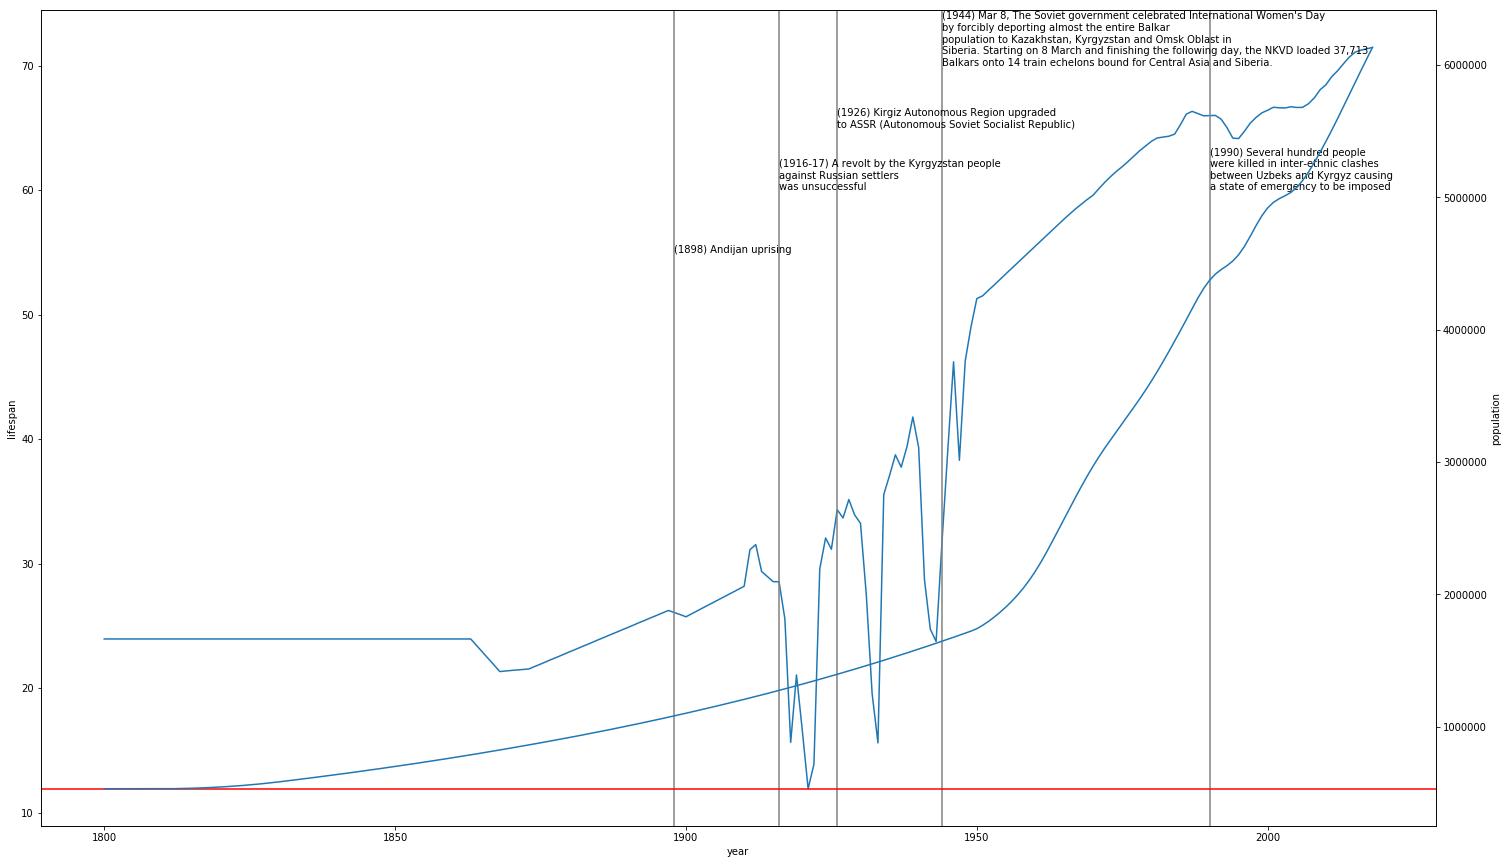

In [250]:
#https://www.worldatlas.com/webimage/countrys/asia/kyrgyzstan/kgtimeln.htm
plt.figure(figsize=(25,15))
sns.lineplot(data = df[df['country']=='Kyrgyz Republic'], x='year', y='lifespan')
plt.axvline(x=1898, color='grey');
plt.text(x=1898, y=55, s='(1898) Andijan uprising')
plt.axvline(x=1916, color='grey');
plt.text(x=1916, y=60, s='(1916-17) A revolt by the Kyrgyzstan people \nagainst Russian settlers \nwas unsuccessful')

plt.axvline(x=1926, color='grey');
plt.text(x=1926,y=65,s='(1926) Kirgiz Autonomous Region upgraded \nto ASSR (Autonomous Soviet Socialist Republic)')
plt.axvline(x=1944, color='grey');
plt.text(x=1944, y=70, s ="(1944) Mar 8, The Soviet government celebrated International Women's Day \nby forcibly deporting almost the entire Balkar \npopulation to Kazakhstan, Kyrgyzstan and Omsk Oblast in \nSiberia. Starting on 8 March and finishing the following day, the NKVD loaded 37,713 \nBalkars onto 14 train echelons bound for Central Asia and Siberia.")

plt.axvline(x=1990, color='grey');
plt.text(x=1990, y=60, s='(1990) Several hundred people \nwere killed in inter-ethnic clashes \nbetween Uzbeks and Kyrgyz causing \na state of emergency to be imposed ')
plt.axhline(y=df[df['country']=='Kyrgyz Republic']['lifespan'].min(), color='red', label=df[df['country']=='Kyrgyz Republic']['lifespan'].min() )

ax2 = plt.twinx()
sns.lineplot(data = df[df['country']=='Kyrgyz Republic'], x='year', ax =ax2, y='population', yticks=['1 Million', ]);
plt.show();

(-1, 2)

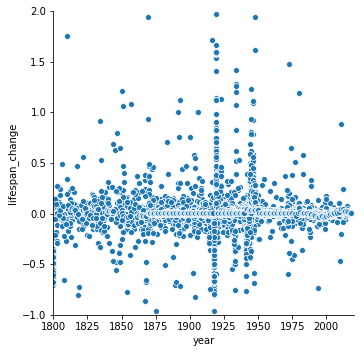

In [146]:
sns.relplot(data=real_change,x='year', y='lifespan_change', kind='scatter' )
plt.xlim(1800,2020)
plt.ylim((-1, 2))

(-0.25, 2.01)

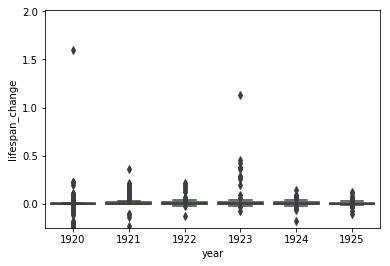

In [160]:
d= real_change[real_change['year'].between(1920,1925)]
sns.boxplot(data=d,x='year', y='lifespan_change')
plt.ylim((-0.25, 2.01))



In [165]:
chm = pd.read_csv("https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--infant_mortality_rate_per_1000_births--by--geo--time.csv")
chm_ls = pd.merge(chm,lifespan)

In [169]:
chm_ls

,geo,time,infant_mortality_rate_per_1000_births,life_expectancy_years,infant_mortality_change
0,afg,1960,245.0,38.65,NaN
1,afg,1961,240.5,39.36,-0.018367
2,afg,1962,236.3,40.07,-0.017464
3,afg,1963,232.3,40.78,-0.016928
4,afg,1964,228.5,41.51,-0.016358
5,afg,1965,224.6,42.22,-0.017068
6,afg,1966,220.7,42.94,-0.017364
7,afg,1967,217.0,43.66,-0.016765
8,afg,1968,213.3,44.37,-0.017051
9,afg,1969,209.8,45.08,-0.016409


In [170]:
chm_ls['infant_mortality_change']=chm_ls['infant_mortality_rate_per_1000_births'].pct_change()
chm_ls['lifespan_change'] = chm_ls['life_expectancy_years'].pct_change()

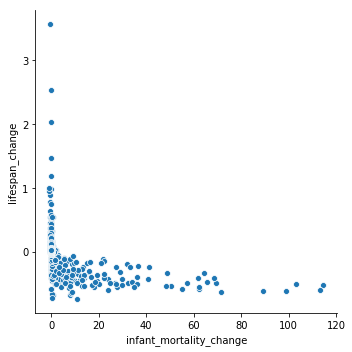

In [171]:
sns.relplot(data=chm_ls,  x ='infant_mortality_change' , y= 'lifespan_change')

In [172]:
chm_income =pd.merge(chm, income)

In [173]:
chm_income.head()

,geo,time,infant_mortality_rate_per_1000_births,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1960,245.0,1213
1,afg,1961,240.5,1199
2,afg,1962,236.3,1195
3,afg,1963,232.3,1192
4,afg,1964,228.5,1190


In [174]:
chm_income['infant_mortality_change']=chm_income['infant_mortality_rate_per_1000_births'].pct_change()
chm_income['income_change'] = chm_income['income_per_person_gdppercapita_ppp_inflation_adjusted'].pct_change()

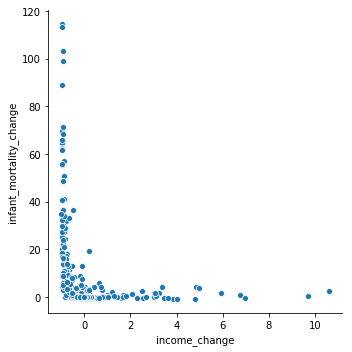

In [178]:
sns.relplot(data=chm_income,  y ='infant_mortality_change' , x= 'income_change')

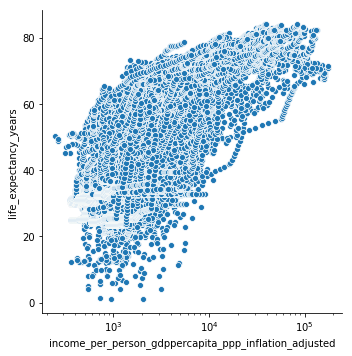

In [181]:
income_ls = pd.merge(income,lifespan)
sns.relplot(data=income_ls, x ='income_per_person_gdppercapita_ppp_inflation_adjusted', y= 'life_expectancy_years')
plt.xscale('log')